# Laborator 5

# Programare Genetică cu DEAP

## 1. Introducere

**Ce este Programarea Genetică?**

[Programarea Genetică (Genetic Programming - GP)](https://en.wikipedia.org/wiki/Genetic_programming) este o tehnică de calcul evolutiv, inspirată de teoria selecției naturale a lui Darwin, specializată în descoperirea automată a programelor de calculator care rezolvă (sau aproximează rezolvarea) unei sarcini specifice. Spre deosebire de alți algoritmi genetici care optimizează de obicei un set de parametri (reprezentați ca șiruri de biți, vectori de numere reale etc.), GP manipulează direct structuri arborescente care reprezintă programe sau expresii.

**Scurt context istoric:**

Deși idei similare au existat anterior, Programarea Genetică a fost popularizată și formalizată în principal de [John Koza](https://en.wikipedia.org/wiki/John_Koza) în anii '90, pornind de la lucrările sale despre evoluția programelor LISP. GP a demonstrat capacitatea de a genera soluții competitive cu cele umane pentru o varietate de probleme.

**Principii de bază:**

GP urmează ciclul evolutiv standard:
1.  **Inițializare:** Se generează o populație inițială de programe/expresii aleatoare.
2.  **Evaluare (Fitness):** Fiecare program din populație este executat și performanța sa este evaluată folosind o funcție de fitness. Aceasta măsoară cât de bine rezolvă programul problema dată.
3.  **Selecție:** Programele cu fitness mai bun au o probabilitate mai mare de a fi selectate pentru reproducere.
4.  **Operatori genetici:** Programele selectate sunt supuse unor operatori genetici (precum încrucișarea și mutația) pentru a crea o nouă generație de programe.
5.  **Iterație:** Pașii 2-4 se repetă pentru un număr de generații sau până când se atinge un criteriu de oprire (de ex., o soluție suficient de bună).

**Diferențe față de alte abordări (evolutive):**

*   **Algoritmi Genetici (AG) clasici:**
    *   **Reprezentare:** AG clasici folosesc de obicei reprezentări liniare de lungime fixă (ex. șiruri de biți). GP folosește reprezentări arborescente de lungime și structură variabile.
    *   **Ce se evoluează:** AG optimizează parametri. GP evoluează structura și conținutul programelor.
*   **Strategii Evolutive (ES):**
    *   **Reprezentare:** ES operează de obicei pe vectori de numere reale.
    *   **Operatori:** ES pun accent pe mutație (adesea cu auto-adaptarea parametrilor de mutație) și selecție deterministică.
*   **Tabu Search (TS):**
    *   **Natura:** TS este o metaheuristică de căutare locală, nu un algoritm populațional.
    *   **Memorie:** TS folosește o "listă tabu" pentru a evita ciclarea și a explora noi regiuni ale spațiului soluțiilor.

GP este adesea mai costisitoare computațional decât AG clasici, dar poate aborda o clasă mai largă de probleme, în special cele unde structura soluției nu este cunoscută a priori.

## 2. Componentele cheie

### 2.1. Reprezentarea indivizilor (programele)

În GP, indivizii sunt de obicei reprezentați ca [arbori de sintaxă](https://en.wikipedia.org/wiki/Abstract_syntax_tree).
*   **Noduri interne (funcții):** Acestea sunt operații sau funcții care acceptă unul sau mai mulți argumenți. De exemplu: `+`, `-`, `*`, `/`, `sin`, `cos`, `if-then-else`. Aritatea unei funcții determină numărul de copii pe care îi va avea nodul respectiv.
*   **Noduri frunză (terminale):** Acestea sunt intrările programului (variabile) sau constante. De exemplu: `x`, `y`, `0.5`, `True`. Terminalele nu au copii.

**Exemplu:** Expresia `(x + 5) * sin(y)` poate fi reprezentată ca arborele:
```
      *
     / \
    +   sin
   / \   |
  x   5  y
```

### 2.2. Inițializarea populației

Generarea populației inițiale de arbori trebuie să asigure o diversitate suficientă. Metode comune includ:
*   **Full (completă):** Toate frunzele arborelui se află la aceeași adâncime maximă specificată. Nodurile interne sunt alese doar dintre funcții până la penultimul nivel.
*   **Grow (creștere):** Nodurile sunt alese aleator dintre funcții și terminale. Arborii pot avea adâncimi variabile, până la o limită maximă.
*   **Ramped Half-and-Half:** O combinație a celor două. O parte din populație este generată cu metoda `Full` și cealaltă cu `Grow`, pentru diferite limite de adâncime, asigurând o bună diversitate structurală.

### 2.3. Funcția de Fitness

Funcția de fitness este crucială și specifică problemei. Ea cuantifică cât de bine un program (individ) rezolvă sarcina.
*   Pentru **regresie simbolică**, fitness-ul poate fi eroarea pătratică medie (MSE) între ieșirea programului și valorile țintă.
*   Pentru **clasificare**, poate fi acuratețea clasificării sau o altă metrică relevantă (F1-score, AUC).

### 2.4. Operatorii genetici

*   **Încrucișarea (Crossover):** Cel mai comun este **subtree crossover (încrucișarea de subarbori)**.
    1.  Se selectează doi indivizi părinți.
    2.  În fiecare părinte, se alege aleator un nod (punct de încrucișare).
    3.  Subarborele care pornește din punctul de încrucișare al primului părinte este schimbat cu subarborele care pornește din punctul de încrucișare al celui de-al doilea părinte, generând doi copii.
    *Importanța tipurilor:* Dacă se folosește GP puternic tipizat (Strongly Typed GP - STGP), punctele de încrucișare trebuie alese astfel încât tipurile de date returnate de subarbori să fie compatibile cu contextul în care sunt inserați.

*   **Mutația:** Introduce variație aleatoare. Tipuri comune:
    *   **Point Mutation (Mutație punctuală):** Un nod din arbore este înlocuit cu un alt primitiv de aceeași aritate (sau un terminal cu alt terminal, respectând tipurile).
    *   **Subtree Mutation (Mutație de subarbore):** Un subarbore ales aleator este înlocuit cu un nou subarbore generat aleator.
    *   **Hoist Mutation:** Un subarbore ales aleator devine noul arbore principal.
    *   **Shrink Mutation:** Un nod funcție ales aleator este înlocuit cu unul dintre terminalele sale (dacă este posibil).

### 2.5. Controlul "balonării" (Bloat Control)

"Bloat" (balonare) este tendința programelor din GP de a crește în dimensiune (număr de noduri sau adâncime) de-a lungul generațiilor, fără o îmbunătățire corespunzătoare a fitness-ului. Programele mai mari sunt mai costisitoare de evaluat și mai greu de interpretat.
Strategii de control:
*   **Limitarea adâncimii/dimensiunii:** Se impun limite stricte asupra adâncimii maxime sau numărului de noduri (DEAP folosește `gp.staticLimit`).
*   **Presiunea de parcimonie (Parsimony Pressure):** Se penalizează programele mai mari în funcția de fitness sau în procesul de selecție.
*   **Operatori Specifici:** Anumiți operatori (ex. shrink mutation) pot ajuta la reducerea dimensiunii.

### 2.6. GP puternic tipizat ([Strongly Typed GP - STGP](https://algorithmafternoon.com/programming/strongly_typed_genetic_programming/))

În GP standard (netipizat), orice funcție poate lua ca argument orice terminal sau rezultatul oricărei alte funcții. Acest lucru poate duce la programe invalide semantic (ex. `sin(True)`).
STGP introduce constrângeri de tip. Fiecare funcție specifică tipurile argumentelor sale și tipul valorii returnate. Terminalele au și ele tipuri. Operatorii genetici sunt modificați pentru a respecta aceste constrângeri, asigurând că doar programe valide din punct de vedere sintactic și al tipurilor sunt generate. Exemplul cu clasificarea spam folosește STGP.

## 3. Exemplul 1: Clasificarea e-mailurilor spam

Vom folosi GP pentru a evolua un clasificator care să distingă e-mailurile spam de cele non-spam (ham), bazându-se pe diverse caracteristici ale e-mailurilor.

Începem prin instalarea DEAP și descărcarea setului de date `spambase.csv`.

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/DEAP/deap/60913c5543abf8318ddce0492e8ffcdf37974d86/examples/gp/spambase.csv
!ls

--2025-05-29 13:37:02--  https://raw.githubusercontent.com/DEAP/deap/60913c5543abf8318ddce0492e8ffcdf37974d86/examples/gp/spambase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [text/plain]
Saving to: ‘spambase.csv’

spambase.csv        100%[===================>] 686.47K  --.-KB/s    in 0.09s   

2025-05-29 13:37:02 (7.52 MB/s) - ‘spambase.csv’ saved [702942/702942]

sample_data  spambase.csv


In [ ]:
# Importăm modulele necesare.

import random
import operator
import csv
import itertools
import numpy

from functools import partial # Pentru a crea funcții cu argumente parțial predefinite

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp


**Pregătirea Datelor:**

Citim fișierul `spambase.csv`. Fiecare rând reprezintă un e-mail, având 57 de caracteristici numerice (frecvența anumitor cuvinte, simboluri etc.) și o etichetă finală (1 pentru spam, 0 pentru non-spam).

In [ ]:
# Citirea caracteristicilor e-mailurilor și stocarea lor într-o listă de liste.
# Setul de date este de la: http://archive.ics.uci.edu/ml/datasets/Spambase
with open("./spambase.csv") as spambase_file: # Am redenumit variabila pentru claritate
    spamReader = csv.reader(spambase_file)
    # Convertim fiecare element la float
    spam_data = list(list(float(elem) for elem in row) for row in spamReader)


**Definirea Mulțimii de Primitive (Primitive Set) pentru GP Puternic Tipizat:**

Aici folosim `gp.PrimitiveSetTyped`.
*   `"MAIN"`: Numele mulțimii de primitive (poate fi orice șir).
*   `itertools.repeat(float, 57)`: Specifică tipurile argumentelor de intrare ale programului. Avem 57 de caracteristici, toate de tip `float`. `itertools.repeat` generează o secvență de 57 de `float`-uri.
*   `bool`: Specifică tipul de date returnat de programul final. Vrem ca programul să returneze `True` (spam) sau `False` (non-spam).
*   `"IN"`: Un prefix pentru numele argumentelor de intrare (ex. `IN0`, `IN1`, ..., `IN56`).

In [ ]:
# Definim o nouă mulțime de primitive pentru GP puternic tipizat
# Programul nostru va lua 57 de argumente de tip float (caracteristicile e-mailului)
# și va returna o valoare booleană (spam/non-spam).
# "IN" este un prefix pentru argumentele de intrare.
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 57), bool, "IN")

Adăugăm primitivele (funcții și terminale) la `pset`. Pentru fiecare primitivă, specificăm:
1.  Funcția/valoarea în sine (ex. `operator.and_`).
2.  O listă cu tipurile argumentelor de intrare (ex. `[bool, bool]` pentru `and_`).
3.  Tipul valorii returnate (ex. `bool` pentru `and_`).

In [ ]:
# Operatori booleeni
pset.addPrimitive(operator.and_, [bool, bool], bool, name="AND") # Adăugăm un nume explicit pentru vizualizare
pset.addPrimitive(operator.or_, [bool, bool], bool, name="OR")
pset.addPrimitive(operator.not_, [bool], bool, name="NOT")

# Operatori pe numere reale (float)
# Definim o funcție de diviziune protejată pentru a evita ZeroDivisionError
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1.0 # Returnăm 1.0, o valoare neutră în anumite contexte

pset.addPrimitive(operator.add, [float, float], float, name="ADD")
pset.addPrimitive(operator.sub, [float, float], float, name="SUB")
pset.addPrimitive(operator.mul, [float, float], float, name="MUL")
pset.addPrimitive(protectedDiv, [float, float], float, name="pDIV")

# Operatori logici/de comparație și control
# Definim o funcție if-then-else
def if_then_else(condition, out1, out2): # Am schimbat 'input' în 'condition' pentru claritate
    if condition:
        return out1
    else:
        return out2

# Comparații care returnează un boolean
pset.addPrimitive(operator.lt, [float, float], bool, name="LT") # Less Than
pset.addPrimitive(operator.gt, [float, float], bool, name="GT") # Greater Than (adăugat pentru completitudine)
pset.addPrimitive(operator.eq, [float, float], bool, name="EQ") # Equal

# Funcția if_then_else poate returna diferite tipuri, în funcție de out1/out2.
# Aici, o folosim pentru a returna un float, dar am putea defini alta pentru bool.
# Acest if_then_else este mai degrabă un selector de valori float bazat pe o condiție bool.
# Pentru clasificatorul nostru, ar fi mai util un if_then_else care returnează bool.
# Să adăugăm o versiune care returnează bool, dacă e necesar,
# sau să ne bazăm pe faptul că ieșirea finală a programului trebuie să fie bool.
# Momentan, păstrăm funcția originală, dar este un punct de reflecție.
# Acest if_then_else specificat aici: if (bool) then (float) else (float) -> float.
# El nu contribuie direct la rezultatul final boolean al programului, ci la o valoare float intermediară
# care apoi poate fi folosită într-o comparație (ex. LT, GT) pentru a obține un bool.
pset.addPrimitive(if_then_else, [bool, float, float], float, name="IF_THEN_ELSE_FLOAT")


# Terminale
# Constante efemere: generează o valoare constantă nouă la fiecare creare (în limitele date)
# Aici, o constantă float între 0 și 100.
# `partial` este folosit pentru a crea o funcție `random_uniform_0_100` care nu ia argumente,
# dar apelează `random.uniform` cu 0 și 100.
pset.addEphemeralConstant("rand100", partial(random.uniform, 0, 100), float)

# Constante terminale booleene
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

# Adăugăm și o constantă float fixă, de exemplu 0.0 și 1.0, pentru comparații.
pset.addTerminal(0.0, float, name="ZERO_FLOAT")
pset.addTerminal(1.0, float, name="ONE_FLOAT")

**Configurarea tipului de fitness și a indivizilor:**

*   `creator.create("FitnessMax", base.Fitness, weights=(1.0,))`: Definim un tip de fitness numit `FitnessMax`. Scopul este maximizarea (deoarece `weights=(1.0,)`). Dacă am vrea minimizare (ex. eroare), am folosi `weights=(-1.0,)`.
*   `creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)`: Definim tipul `Individual`. Fiecare individ este un `gp.PrimitiveTree` (arborele de program) și va avea asociat un atribut `fitness` de tipul `FitnessMax` definit mai sus.

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

**Configurarea uneltelor (Toolbox):**

`Toolbox` este un container convenabil pentru funcțiile folosite în algoritmul evolutiv.
*   `toolbox.register("expr", gp.genHalfAndHalf, ...)`: Înregistrează o funcție numită `expr` care generează o expresie (un arbore). `gp.genHalfAndHalf` este o metodă standard de inițializare care combină metodele `Full` și `Grow` pentru a crea arbori cu adâncimi între `min_` și `max_`.
*   `toolbox.register("individual", tools.initIterate, ...)`: Înregistrează funcția `individual` care creează un individ complet. `tools.initIterate` ia un container (aici, `creator.Individual`) și îl populează folosind o funcție (aici, `toolbox.expr`).
*   `toolbox.register("population", tools.initRepeat, ...)`: Înregistrează funcția `population` care creează o listă de indivizi.
*   `toolbox.register("compile", gp.compile, ...)`: Înregistrează funcția `compile`. Aceasta transformă un arbore (expresie genetică) într-o funcție Python executabilă.

In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3) # Am crescut puțin max_ pentru potențial mai complex
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

**Funcția de evaluare (Fitness):**

Această funcție, `evalSpambase`, determină cât de bun este un individ (program).
1.  Compilează expresia genetică a individului într-o funcție Python (`func`).
2.  Selectează aleator un eșantion de 400 de e-mailuri din setul de date (pentru eficiență și pentru a evita overfitting-ul pe întregul set la fiecare evaluare).
3.  Pentru fiecare e-mail din eșantion, aplică funcția `func` pe primele 57 de caracteristici.
4.  Compară rezultatul (`bool(func(*mail[:57]))`) cu eticheta reală a e-mailului (`bool(mail[57])`).
5.  Returnează numărul total de predicții corecte. Acest număr va fi fitness-ul individului. (Notă: DEAP necesită ca funcția de fitness să returneze un tuplu).

In [ ]:
def evalSpambase(individual):
    # Transformă expresia arborelui într-o funcție apelabilă
    try:
        func = toolbox.compile(expr=individual)
    except Exception as e:
        # Uneori, la STGP, pot apărea erori de compilare dacă un subarbore nu are tipul așteptat
        # Acest lucru ar trebui să fie rar dacă pset și operatorii sunt bine definiți.
        # O eroare comună ar fi un program care nu returnează tipul final așteptat (bool aici).
        # print(f"Error compiling individual: {individual}. Error: {e}")
        return 0, # Penalizare maximă

    # Selectează aleator 400 de e-mailuri din baza de date spam
    # random.sample asigură că nu se repetă e-mailurile în eșantion
    spam_samp = random.sample(spam_data, 400)

    # Evaluează suma e-mailurilor identificate corect ca spam sau non-spam
    # mail[:57] sunt caracteristicile, mail[57] este eticheta (0 sau 1)
    result = sum(bool(func(*mail[:57])) is bool(mail[57]) for mail in spam_samp)
    return result, # Fitness-ul este numărul de clasificări corecte

toolbox.register("evaluate", evalSpambase)

**Înregistrarea Operatorilor Genetici și a Selecției:**

*   `toolbox.register("select", tools.selTournament, tournsize=3)`: Selecția prin turneu. Se aleg aleator `tournsize` indivizi, iar cel mai bun dintre ei este selectat.
*   `toolbox.register("mate", gp.cxOnePoint)`: Încrucișare într-un singur punct (specifică pentru arbori, este de fapt subtree crossover, unde "punctul" este un nod).
*   `toolbox.register("expr_mut", gp.genFull, ...)`: Pentru mutație, uneori se generează un nou subarbore. `expr_mut` definește cum se generează acest subarbore (aici, folosind metoda `Full`).
*   `toolbox.register("mutate", gp.mutUniform, ...)`: Mutație uniformă. Fiecare nod din arbore are o șansă de a fi înlocuit de un nou subarbore generat de `expr_mut` sau un terminal/primitivă compatibilă.

Controlul balonării (bloat):
`gp.staticLimit` este un decorator care previne ca operatorii de încrucișare și mutație să creeze indivizi care depășesc o anumită adâncime (`max_value=17` în acest caz). `operator.attrgetter("height")` specifică faptul că limita se aplică atributului `height` al individului.


In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) # Subarborii pentru mutație
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# Aplicăm limite pentru înălțimea arborilor pentru a controla balonarea (bloat)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

**Configurarea și rularea GP:**

Funcția `main` configurează și rulează algoritmul.
*   `random.seed(10)`: Asigură reproductibilitatea experimentului.
*   `pop = toolbox.population(n=400)`: Creează o populație inițială de 400 de indivizi.
*   `hof = tools.HallOfFame(1)`: `HallOfFame` stochează cel mai bun individ găsit vreodată. Aici, stochează doar 1.
*   `stats = tools.Statistics(...)`: Colectează statistici despre fitness-ul populației (medie, dev. standard, min, max).
*   `algorithms.eaSimple(...)`: Acesta este unul dintre algoritmii evolutivi predefiniți în DEAP.
    *   `pop`: Populația inițială.
    *   `toolbox`: Containerul cu unelte.
    *   `0.5`: Probabilitatea de încrucișare (cxpb).
    *   `0.2`: Probabilitatea de mutație (mutpb).
    *   `100`: Numărul de generații (ngen).
    *   `stats`: Obiectul de statistici.
    *   `halloffame=hof`: Obiectul Hall of Fame.
    *   `verbose=True` (adăugat): Afișează progresul.

In [ ]:
def main_spam(): # Redenumit pentru a evita coliziuni dacă rulăm ambele exemple în același notebook
    random.seed(42) # Schimbat seed-ul pentru a vedea potențial rezultate diferite
    pop = toolbox.population(n=300) # Populație puțin mai mică
    hof = tools.HallOfFame(1) # Păstrăm cel mai bun individ

    # Configurăm statisticile pentru a urmări evoluția fitness-ului
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # Rulăm algoritmul evolutiv
    # Am redus numărul de generații pentru un exemplu mai rapid
    pop, logbook = algorithms.eaSimple(pop, toolbox,
                                      cxpb=0.7,    # Probabilitate mai mare de crossover
                                      mutpb=0.2,   # Probabilitate de mutație
                                      ngen=50,     # Număr de generații
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

    return pop, logbook, hof # Am schimbat stats cu logbook, care conține statisticile

# Rulăm experimentul
pop_spam, log_spam, hof_spam = main_spam()

# Afișăm cel mai bun individ găsit
print("Cel mai bun individ găsit pentru clasificarea spam:")
if len(hof_spam) > 0:
    print(hof_spam[0])
    print(f"Fitness (clasificări corecte din 400): {hof_spam[0].fitness.values[0]}")
else:
    print("Nu s-a găsit niciun individ în Hall of Fame.")


gen	nevals	avg    	std    	min	max
0  	300   	208.657	46.7598	79 	310
1  	227   	231.853	40.8402	76 	315
2  	229   	248.393	37.4133	129	319
3  	221   	260.37 	39.2021	102	330
4  	221   	275.04 	38.4421	110	337
5  	224   	279.317	41.8268	108	338
6  	230   	283.853	44.3264	114	343
7  	235   	290.36 	37.7544	113	345
8  	215   	294    	41.7521	135	361
9  	226   	291.637	46.3914	144	353
10 	231   	296.167	46.7323	125	351
11 	228   	304.143	38.3026	136	349
12 	215   	304.1  	42.9459	83 	349
13 	236   	307.623	39.5135	146	354
14 	231   	315.713	35.0288	155	359
15 	232   	316.083	37.1453	154	352
16 	244   	317.51 	38.778 	143	355
17 	204   	323.687	30.4599	149	354
18 	227   	322.303	35.4935	147	357
19 	223   	323.343	38.2796	158	359
20 	215   	330.263	28.3863	147	363
21 	238   	325.58 	34.3887	148	363
22 	233   	330.723	26.5542	191	360
23 	232   	329.563	31.2841	138	362
24 	203   	333.12 	27.7284	158	364
25 	226   	332.01 	32.9693	122	363
26 	220   	330.92 	33.5937	155	363
27 	221   	333.517	3

In [ ]:
# Putem vizualiza și logbook-ul pentru a vedea progresul
print("\nIstoricul evoluției (Logbook):")
print(log_spam)


Istoricul evoluției (Logbook):
gen	nevals	avg    	std    	min	max
0  	300   	208.657	46.7598	79 	310
1  	227   	231.853	40.8402	76 	315
2  	229   	248.393	37.4133	129	319
3  	221   	260.37 	39.2021	102	330
4  	221   	275.04 	38.4421	110	337
5  	224   	279.317	41.8268	108	338
6  	230   	283.853	44.3264	114	343
7  	235   	290.36 	37.7544	113	345
8  	215   	294    	41.7521	135	361
9  	226   	291.637	46.3914	144	353
10 	231   	296.167	46.7323	125	351
11 	228   	304.143	38.3026	136	349
12 	215   	304.1  	42.9459	83 	349
13 	236   	307.623	39.5135	146	354
14 	231   	315.713	35.0288	155	359
15 	232   	316.083	37.1453	154	352
16 	244   	317.51 	38.778 	143	355
17 	204   	323.687	30.4599	149	354
18 	227   	322.303	35.4935	147	357
19 	223   	323.343	38.2796	158	359
20 	215   	330.263	28.3863	147	363
21 	238   	325.58 	34.3887	148	363
22 	233   	330.723	26.5542	191	360
23 	232   	329.563	31.2841	138	362
24 	203   	333.12 	27.7284	158	364
25 	226   	332.01 	32.9693	122	363
26 	220   	330.92 	33.5

**Vizualizarea celei mai bune soluâii:**

Pentru a înțelege ce program a evoluat GP, îl putem vizualiza ca arbore. Avem nevoie de `graphviz` și `pygraphviz`.

In [ ]:
!apt-get install -qq graphviz libgraphviz-dev pkg-config > /dev/null
!pip install -q pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


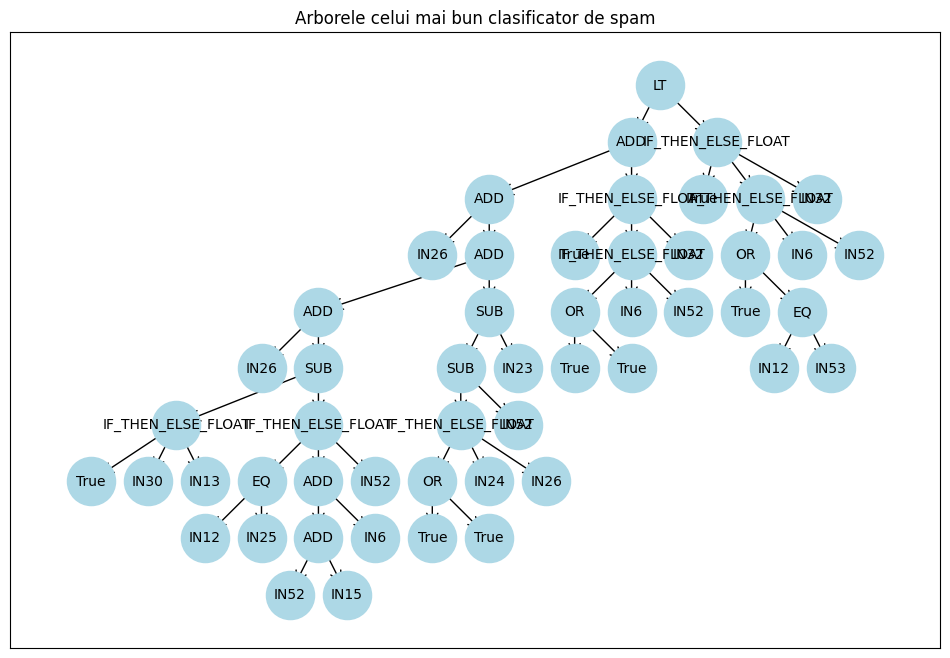

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
# networkx.drawing.nx_agraph a fost mutat, verificăm calea corectă
try:
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    print("Atenție: networkx.drawing.nx_agraph.graphviz_layout nu a putut fi importat.")
    print("Încercați: pip install pygraphviz pydot")
    # O alternativă, dacă pygraphviz nu funcționează direct cu nx_agraph
    import pydot
    from networkx.drawing.nx_pydot import graphviz_layout


if len(hof_spam) > 0 and hof_spam[0] is not None :
    expr_spam = hof_spam[0]
    nodes, edges, labels = gp.graph(expr_spam)

    plt.figure(figsize=(12, 8)) # Mărim figura pentru lizibilitate
    g = nx.DiGraph() # Folosim DiGraph pentru a arăta direcția (de la rădăcină la frunze)
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)

    # Folosim graphviz_layout pentru o aranjare ierarhică "dot"
    try:
        pos = graphviz_layout(g, prog="dot")
    except Exception as e:
        print(f"Eroare la graphviz_layout: {e}. Se folosește un layout alternativ.")
        pos = nx.spring_layout(g) # Un layout "de rezervă"

    nx.draw_networkx_nodes(g, pos, node_size=1200, node_color='lightblue')
    nx.draw_networkx_edges(g, pos, edgelist=edges, arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(g, pos, labels, font_size=10)
    plt.title("Arborele celui mai bun clasificator de spam")
    plt.show()
else:
    print("Nu s-a găsit un individ în Hall of Fame pentru a fi afișat.")

## 4. Regresie simbolică cu DEAP

Problema standard pentru prezentarea GP este **regresia simbolică**, unde scopul este să deducem o expresie matematică (un model) care se potrivește cel mai bine unui set de date (puncte (x, y)).

Importarea componentelor și librăriilor principale:

In [ ]:
import operator
import math
import random
import numpy as np

# Modulele DEAP sunt deja importate mai sus
# from deap import algorithms, base, creator, tools, gp

# Pentru evitarea împărțirii cu 0, avem nevoie din nou operatorul `protectedDiv`.

# Funcția protectedDiv este deja definită mai sus, o putem refolosi.
# def protectedDiv(left, right):
#     try:
#         return left / right
#     except ZeroDivisionError:
#         return 1.0

# definim mulțimea primitivelor. De data aceasta, vom folosi o mulțime de primitive **netipizată** (`gp.PrimitiveSet`), deoarece toate operațiile și intrările vor fi numerice (float).
#   "MAIN": Numele mulțimii.
#   1: Numărul de argumente (input) ale programului (în acest caz, o singură variabilă `x`).

pset_symb = gp.PrimitiveSet("MAIN", 1, "x") # Am adăugat "x" ca prefix pentru argumentul de intrare

# Operatori binari (cu 2 argumente)
pset_symb.addPrimitive(operator.add, 2, name="add")
pset_symb.addPrimitive(operator.sub, 2, name="sub")
pset_symb.addPrimitive(operator.mul, 2, name="mul")
pset_symb.addPrimitive(protectedDiv, 2, name="pDiv")

# Operatori unari (cu 1 argument)
pset_symb.addPrimitive(operator.neg, 1, name="neg")
pset_symb.addPrimitive(math.cos, 1, name="cos")
pset_symb.addPrimitive(math.sin, 1, name="sin")
# Putem adăuga și alți operatori, de ex. sqrt protejat, log protejat
def protectedSqrt(val):
    return math.sqrt(abs(val))
pset_symb.addPrimitive(protectedSqrt, 1, name="pSqrt")

# Constante
# addEphemeralConstant generează o nouă constantă (aleatoare în interval) de fiecare dată când este accesată
# pentru un nou nod terminal în timpul creării arborelui.
pset_symb.addEphemeralConstant("randU", lambda: random.uniform(-5, 5)) # Uniform între -5 și 5
pset_symb.addEphemeralConstant("randN", lambda: random.normalvariate(0, 1)) # Distribuție normală

# Terminale fixe (dacă este necesar)
# pset_symb.addTerminal(1.0, name="one")
# pset_symb.addTerminal(math.pi, name="PI")


# Redenumim argumentul implicit ARG0 în 'x' pentru lizibilitate.
# Acest lucru se face automat dacă specificăm prefixul la crearea PrimitiveSet,
# dar îl putem face și explicit.
# pset_symb.renameArguments(ARG0='x') # Deja făcut prin prefixul "x"

/usr/local/lib/python3.11/dist-packages/deap/gp.py:257: RuntimeWarning: Ephemeral randU function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
/usr/local/lib/python3.11/dist-packages/deap/gp.py:257: RuntimeWarning: Ephemeral randN function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


Urmează definirea reprezentării (genotipul indivizilor). Vom folosi o reprezentare clasică de tip arbore (`gp.PrimitiveTree`). De data aceasta, căutăm să minimizăm eroarea, deci `weights=(-1.0,)`.

In [ ]:
# Verificăm dacă tipurile există deja pentru a evita erori la re-rulare
if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if not hasattr(creator, "IndividualSymb"): # Folosim un nume nou pentru a nu suprascrie celălalt
    creator.create("IndividualSymb", gp.PrimitiveTree, fitness=creator.FitnessMin, pset=pset_symb)

Funcția fitness transformă arborele de sintaxă codificat de individ într-o funcție apelabilă și evaluează eroarea pătratică medie (MSE) a aproximării față de o funcție țintă.

Definim funcția țintă pe care dorim să o aproximăm: `f(x) = x^3 + x^2 + x + 1`.

In [ ]:
def target_func(x):
  return x**3 + x**2 + x + 1
  # Sau o altă funcție, de ex:
  # return x**4 - x**3 + x**2/2.0 - x/3.0
  # return np.sin(x**2) * np.cos(x) - 1.0

# Punctele în care vom evalua funcția (și aproximările)
# Folosim numpy pentru a genera punctele mai ușor
points_x = np.linspace(-5, 5, 100) # 100 de puncte între -5 și 5
# Calculăm valorile țintă o singură dată
points_y_target = np.array([target_func(x_val) for x_val in points_x])

def evalSymbReg(individual, points_x_eval, points_y_target_eval, toolbox_symb_reg):
    # Transformă expresia arborelui într-o funcție apelabilă
    try:
        func = toolbox_symb_reg.compile(expr=individual)
    except Exception as e:
        # print(f"Eroare la compilare: {e}, individ: {individual}")
        # Returnăm o valoare mare de eroare pentru indivizii problematici
        return float('inf'),

    # Calculează eroarea pătratică între expresia evoluată și funcția reală (țintă)
    try:
        sqerrors = ((func(x) - y_target)**2 for x, y_target in zip(points_x_eval, points_y_target_eval))
        mse = math.fsum(sqerrors) / len(points_x_eval)
    except (OverflowError, ValueError) as e:
        # print(f"Eroare numerică în evaluare: {e}")
        mse = float('inf') # Penalizare pentru erori numerice (ex. numere prea mari)

    return mse,

# print("Puncte de evaluare x:", points_x[:10])
# print("Valori țintă y:", points_y_target[:10])

In [ ]:
# Folosim un nou `Toolbox` pentru specificarea parametrilor metodei GP pentru regresie simbolică.

toolbox_symb = base.Toolbox()
toolbox_symb.register("expr", gp.genHalfAndHalf, pset=pset_symb, min_=1, max_=4) # Adâncime maximă mai mare
toolbox_symb.register("individual", tools.initIterate, creator.IndividualSymb, toolbox_symb.expr)
toolbox_symb.register("population", tools.initRepeat, list, toolbox_symb.individual)
toolbox_symb.register("compile", gp.compile, pset=pset_symb)

# Setarea funcției fitness, folosind partial pentru a pre-completa argumentele care nu se schimbă
toolbox_symb.register("evaluate", evalSymbReg, points_x_eval=points_x, points_y_target_eval=points_y_target, toolbox_symb_reg=toolbox_symb)

# Setarea operatorilor de variație și selecție
toolbox_symb.register("select", tools.selTournament, tournsize=7) # Turneu mai mare
toolbox_symb.register("mate", gp.cxOnePoint)
toolbox_symb.register("expr_mut", gp.genFull, min_=0, max_=2) # Subarbori pentru mutație
toolbox_symb.register("mutate", gp.mutUniform, expr=toolbox_symb.expr_mut, pset=pset_symb)

# Setăm limite pentru mărimea maximă a arborilor pentru a evita fenomenul de balonare (bloat-ing)
toolbox_symb.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox_symb.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

stats_fit_symb = tools.Statistics(lambda ind: ind.fitness.values)
stats_size_symb = tools.Statistics(len) # Lungimea este numărul de noduri din arbore

mstats_symb = tools.MultiStatistics(fitness=stats_fit_symb, size=stats_size_symb)
mstats_symb.register("avg", np.mean)
mstats_symb.register("std", np.std)
mstats_symb.register("min", np.min)
mstats_symb.register("max", np.max)

În final, urmează rularea metodei GP pentru problema de regresie simbolică.

In [ ]:
def main_symb_reg():
    random.seed(21) # Alt seed
    pop_symb = toolbox_symb.population(n=500) # Populație mai mare
    hof_symb = tools.HallOfFame(5) # Păstrăm primii 5 cei mai buni

    pop_symb, logbook_symb = algorithms.eaSimple(pop_symb, toolbox_symb,
                                                 cxpb=0.8,    # Probabilitate mare de crossover
                                                 mutpb=0.1,   # Probabilitate mică de mutație
                                                 ngen=70,     # Mai multe generații
                                                 stats=mstats_symb,
                                                 halloffame=hof_symb,
                                                 verbose=True)
    return pop_symb, logbook_symb, hof_symb

pop_s, log_s, hof_s = main_symb_reg()


<ipython-input-6-0dfc3b64c67e>:10: RuntimeWarning: invalid value encountered in scalar divide
  return left / right
<ipython-input-6-0dfc3b64c67e>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return left / right
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


   	      	                  fitness                  	                      size                     
   	      	-------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min	nevals	std	avg  	gen	max	min	nevals	std    
0  	500   	nan	0  	nan	nan	500   	nan	5.974	0  	28 	2  	500   	4.35538
1  	399   	inf	1  	inf	874.81	399   	nan	6.61 	1  	30 	1  	399   	4.61453
2  	409   	inf	2  	inf	298.466	409   	nan	8.68 	2  	35 	1  	409   	5.84924
3  	399   	4640.72	3  	298362	160.147	399   	21984.4	9.832	3  	32 	1  	399   	5.26192
4  	409   	24801.2	4  	4.26741e+06	160.147	409   	248683 	10.888	4  	30 	2  	409   	4.65998
5  	415   	inf    	5  	inf        	154.693	415   	nan    	12.428	5  	38 	1  	415   	5.10772
6  	398   	inf    	6  	inf        	79.2669	398   	nan    	12.926	6  	32 	1  	398   	4.88104
7  	409   	91717.8	7  	1.84166e+07	42.7949	409   	942107 	12.596	7  	31 	2  	409   	4.78255
8  	401   	inf    	8  	inf        	13.9837	401   


Cele mai bune soluții pentru regresia simbolică:
Soluția 1 (Fitness MSE: 0.0067):
	add(add(sub(pDiv(add(x0, cos(add(x0, cos(add(x0, cos(add(x0, cos(sub(pDiv(mul(2.0249018975770667, -0.6263812682625741), sub(2.0249018975770667, 2.0249018975770667)), 2.0249018975770667))))))))), 3.934401813453688), neg(pSqrt(mul(pDiv(add(x0, add(sub(pDiv(mul(2.0249018975770667, add(x0, pSqrt(pDiv(-0.6263812682625741, x0)))), add(x0, x0)), 2.0249018975770667), add(x0, cos(add(x0, cos(sub(pDiv(mul(x0, -0.6263812682625741), sub(pDiv(-0.47880389749610314, x0), 2.0249018975770667)), 2.0249018975770667))))))), pDiv(2.0249018975770667, x0)), -0.6263812682625741)))), x0), mul(x0, pDiv(add(x0, x0), pDiv(2.0249018975770667, add(x0, cos(-0.47880389749610314))))))
Soluția 2 (Fitness MSE: 0.0068):
	add(add(sub(pDiv(add(x0, cos(add(x0, cos(add(x0, cos(add(x0, cos(cos(-0.47880389749610314))))))))), 3.934401813453688), neg(pSqrt(mul(pDiv(add(x0, add(sub(pDiv(mul(2.0249018975770667, add(x0, pSqrt(pDiv(-0.478803897496103

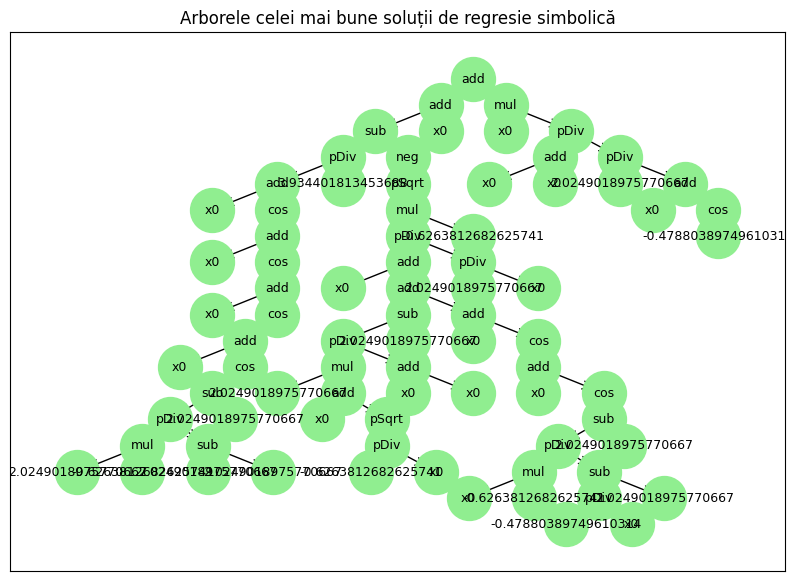

In [ ]:
# Afișarea celor mai bune soluții (expresii matematice) găsite:

print("\nCele mai bune soluții pentru regresia simbolică:")
if len(hof_s) > 0:
    for i, sol_expr in enumerate(hof_s):
        print(f"Soluția {i+1} (Fitness MSE: {sol_expr.fitness.values[0]:.4f}):")
        print(f"\t{sol_expr}")
else:
    print("Nu s-au găsit soluții în Hall of Fame.")

# Putem vizualiza și arborele celei mai bune soluții, similar cu exemplul spam
if len(hof_s) > 0 and hof_s[0] is not None:
    best_expr_symb = hof_s[0]
    nodes_s, edges_s, labels_s = gp.graph(best_expr_symb)

    plt.figure(figsize=(10, 7))
    g_s = nx.DiGraph()
    g_s.add_nodes_from(nodes_s)
    g_s.add_edges_from(edges_s)
    try:
        pos_s = graphviz_layout(g_s, prog="dot")
        nx.draw_networkx_nodes(g_s, pos_s, node_size=1000, node_color='lightgreen')
        nx.draw_networkx_edges(g_s, pos_s, edgelist=edges_s, arrows=True, arrowstyle='->', arrowsize=15)
        nx.draw_networkx_labels(g_s, pos_s, labels_s, font_size=9)
        plt.title("Arborele celei mai bune soluții de regresie simbolică")
        plt.show()
    except Exception as e:
        print(f"Nu s-a putut desena graful pentru regresia simbolică: {e}")
        print("Este posibil ca soluția să fie prea simplă (ex. doar un terminal).")
        print(f"Soluție: {best_expr_symb}")

## 5. Exerciții

1.  **Vizualizare grafică (regresie simbolică):**
    *   Vizualizați grafic funcția `target_func` originală.
    *   Pe același grafic, suprapuneți aproximările generate de 3-5 soluții diferite din `hof_s` (Hall of Fame). Compilați fiecare expresie din `hof_s` într-o funcție Python folosind `toolbox_symb.compile(expr=sol_expr)` și apoi plotați `func(points_x)`. Observați cât de bine se potrivesc.

2.  **Impactul cgomotului (regresie simbolică):**
    *   Modificați, perturbați datele de training  (`points_y_target`) prin adăugarea unui zgomot gaussian aditiv: `points_y_noisy = points_y_target + numpy.random.normal(0, sigma, len(points_y_target))`, unde `sigma` este deviația standard a zgomotului (ex. 0.1, 0.5, 1.0).
    *   Re-rulați algoritmul de regresie simbolică folosind aceste date zgomotoase.
    *   Cum este afectată performanța (fitness-ul minim atins) și structura soluțiilor găsite de prezența și magnitudinea zgomotului? Comparați cu soluțiile obținute pe date curate.

3.  **Modificarea mulțimii de primitive (regresie simbolică):**
    *   Experimentați cu diferite mulțimi de primitive în `pset_symb`. De exemplu:
        *   Eliminați funcțiile trigonometrice (`sin`, `cos`).
        *   Adăugați alte funcții matematice (ex. `math.log` protejat, `math.exp` protejat, `x^2`, `x^3` ca primitive).
        *   Modificați intervalul pentru constantele efemere (`randU`).
    *   Cum influențează aceste schimbări capacitatea algoritmului de a găsi o soluție bună și complexitatea soluțiilor?

4.  **Regresie simbolică pentru o funcție 2D:**
    *   Definiți o nouă funcție țintă `target2(x, y)`, de exemplu: `f(x,y) = sin(x) * cos(y) + x*y/2` sau `f(x,y) = x^2 - y^2`.
    *   Generați un set de date de antrenament:
        *   `x_vals = np.linspace(-2, 2, 20)`
        *   `y_vals = np.linspace(-2, 2, 20)`
        *   Creați un grid de puncte `(xv, yv) = np.meshgrid(x_vals, y_vals)`.
        *   Calculați valorile țintă `z_target = target2(xv, yv)`. Punctele de antrenament vor fi `(xv.flatten(), yv.flatten(), z_target.flatten())`.
    *   Adaptați configurația GP:
        *   `pset_symb2D = gp.PrimitiveSet("MAIN", 2, "ARG")` (pentru 2 argumente de intrare, `ARG0` și `ARG1`, sau `x` și `y` dacă le redenumiți). Redenumiți argumentele în `x` și `y`.
        *   Modificați funcția de evaluare `evalSymbReg2D` pentru a lucra cu două intrări și a calcula MSE pe setul de date 2D.
    *   Rulați algoritmul și analizați soluțiile. Puteți vizualiza suprafața generată de cea mai bună soluție și compara-o cu suprafața funcției `target2` (folosind `plot_surface` din `matplotlib`).


In [ ]:
def target2(x, y):
  return #????? - completați aici cu funcție 2D

In [ ]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
xv, yv = np.meshgrid(x, y)

In [ ]:
z = target2(xv, yv)
print(z)

[[-1.32544426 -1.4160307  -1.31233904 -1.03451664 -0.63654458 -0.19574909
   0.20222297  0.48004536  0.58373703  0.49315059]
 [-0.89405725 -0.98464368 -0.88095202 -0.60312962 -0.20515756  0.23563792
   0.63360998  0.91143238  1.01512404  0.92453761]
 [-0.46563141 -0.55621784 -0.45252618 -0.17470378  0.22326828  0.66406377
   1.06203582  1.33985822  1.44354988  1.35296345]
 [-0.12341017 -0.2139966  -0.11030494  0.16751746  0.56548952  1.006285
   1.40425706  1.68207946  1.78577112  1.69518469]
 [ 0.06611266 -0.02447378  0.07921788  0.35704028  0.75501234  1.19580783
   1.59377989  1.87160229  1.97529395  1.88470751]
 [ 0.06611266 -0.02447378  0.07921788  0.35704028  0.75501234  1.19580783
   1.59377989  1.87160229  1.97529395  1.88470751]
 [-0.12341017 -0.2139966  -0.11030494  0.16751746  0.56548952  1.006285
   1.40425706  1.68207946  1.78577112  1.69518469]
 [-0.46563141 -0.55621784 -0.45252618 -0.17470378  0.22326828  0.66406377
   1.06203582  1.33985822  1.44354988  1.35296345]
 [-0

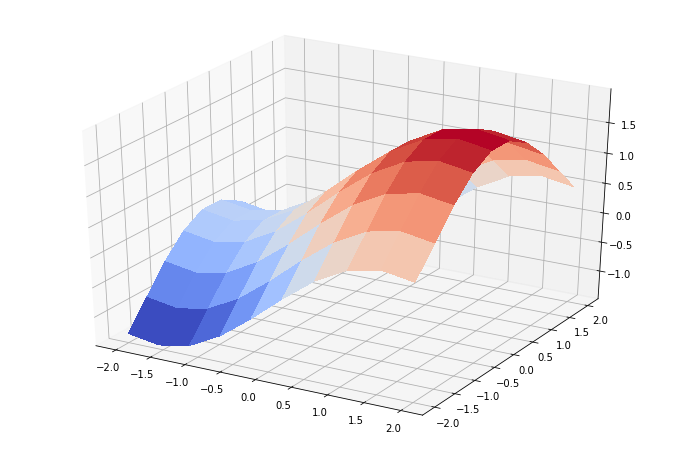

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

5.  **Parametrizare**
    *   Experimentați cu diferiți parametri ai algoritmului `eaSimple`:
        *   Dimensiunea populației (`n` în `toolbox.population`).
        *   Numărul de generații (`ngen`).
        *   Probabilitățile de încrucișare (`cxpb`) și mutație (`mutpb`).
        *   Dimensiunea turneului (`tournsize` în `tools.selTournament`).
    *   Observați cum acești parametri afectează viteza de convergență, calitatea soluției finale și diversitatea populației. Există un compromis?


**Observații suplimentare, concluzii**

*   **Interpretabilitatea soluțiilor:** Un avantaj major al GP (în special pentru regresie simbolică) este că soluțiile sunt adesea expresii sau programe care pot fi înțelese de oameni, spre deosebire de modelele "cutie neagră" (ex. rețele neuronale adânci).
*   **Cost computațional:** GP poate fi foarte costisitoare, deoarece evaluarea fiecărui individ implică executarea unui program. Paralelizarea și tehnicile de eșantionare a datelor (subseturi de fitness) sunt adesea necesare pentru probleme complexe.
*   **Domenii de aplicare (inspirație proiect):**
    *   **Inginerie:** Proiectarea automată a circuitelor, antenelor, structurilor mecanice.
    *   **Finanțe:** Modele de tranzacționare, predicția prețurilor.
    *   **Bioinformatică:** Descoperirea de pattern-uri în secvențe genetice.
    *   **Procesarea imaginilor:** Generarea de filtre, algoritmi de detecție a caracteristicilor.
    *   **Robotică:** Dezvoltarea de controlere pentru roboți.

*   **Cărți de referință:**
    *   "Genetic Programming: An Introduction" și "Genetic Programming II: Automatic Discovery of Reusable Programs" de John R. Koza.
    *   ["A Field Guide to Genetic Programming"](https://github.com/Johnnyboycurtis/genetic-algorithms/blob/master/Field%20Guide%20to%20Genetic%20Programming.pdf) de Riccardo Poli, William B. Langdon, Nicholas F. McPhee.

In [ ]:
#Exe1:

import matplotlib.pyplot as plt
import numpy as np


y_true = [target_func(x) for x in points_x]

plt.figure(figsize=(10, 6))
plt.plot(points_x, y_true, label="Funcția originală", linewidth=2)

num_solutions_to_plot = min(5, len(hof_s))
for i in range(num_solutions_to_plot):
    sol_expr = hof_s[i]
    func_i = toolbox_symb.compile(expr=sol_expr)
    y_pred = [func_i(x) for x in points_x]
    plt.plot(points_x, y_pred, linestyle='--', alpha=0.7, label=f"Aprox. HOF {i+1}")

# 4. Finalizare grafic
plt.title("Regresie simbolică: Funcția originală vs soluții din Hall of Fame")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


EXE2:

Ca sa evaluam robustețea algoritmului de regresie simbolică în fața incertitudinii, perturbăm datele de antrenament prin adăugarea unui zgomot gaussian aditiv. Astfel, valorile țintă points_y_target sunt modificate prin adăugarea de zgomot generat cu numpy.random.normal, cu medie 0 și deviație standard sigma. Acest lucru simulează date reale afectate de erori de măsurare. Algoritmul este apoi rulat pe aceste date perturbate, și evaluăm cum se modifică performanța sa (fitness minim atins), precum și forma expresiilor rezultate. Prin compararea cu soluțiile obținute pe datele curate, putem înțelege cât de bine generalizează algoritmul și cât de sensibil este la zgomot.

In [ ]:
import numpy as np

sigma = 0.5  # poți testa și 0.1, 1.0 etc.
points_y_noisy = points_y_target + np.random.normal(0, sigma, len(points_y_target))

def noisy_eval(individual):
    func = toolbox_symb.compile(expr=individual)
    predictions = [func(x) for x in points_x]
    error = sum((y_pred - y_true)**2 for y_pred, y_true in zip(predictions, points_y_noisy))
    return error,

toolbox_symb.register("evaluate", noisy_eval)

pop = toolbox_symb.population(n=300)
hof_s_noisy = tools.HallOfFame(5)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

pop, logbook = algorithms.eaSimple(pop, toolbox_symb,
                                    cxpb=0.5, mutpb=0.2,
                                    ngen=40, stats=stats,
                                    halloffame=hof_s_noisy, verbose=False)

# Rezultate
best_noisy = hof_s_noisy[0]
best_error = noisy_eval(best_noisy)[0]

print("Cea mai bună soluție (cu zgomot):", best_noisy)
print("Eroare totală pe date zgomotoase:", best_error)


exe3:

Un element esențial al regresiei simbolice este mulțimea de primitive (pset_symb), adică funcțiile și operatorii disponibili în timpul evoluției expresiilor matematice. Prin modificarea acestei mulțimi, putem controla expresivitatea și complexitatea soluțiilor generate. În acest exercițiu, vom experimenta în trei direcții: (1) eliminarea funcțiilor trigonometrice (sin, cos), (2) adăugarea unor funcții matematice suplimentare (de exemplu log, exp, ridicări la pătrat sau cub), și (3) modificarea intervalului constantelor efemere (ephemeral constants) generate prin randU. Observăm cum aceste schimbări afectează capacitatea algoritmului de a descoperi o soluție precisă și/sau simplă.

In [ ]:
import operator
import math
from deap import gp

def protected_div(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def protected_log(x):
    return math.log(abs(x) + 1e-6)

def protected_exp(x):
    try:
        return math.exp(min(x, 100))
    except OverflowError:
        return 1e6

pset_symb = gp.PrimitiveSet("MAIN", 1)

pset_symb.addPrimitive(operator.add, 2)
pset_symb.addPrimitive(operator.sub, 2)
pset_symb.addPrimitive(operator.mul, 2)
pset_symb.addPrimitive(protected_div, 2)
pset_symb.addPrimitive(protected_log, 1)
pset_symb.addPrimitive(protected_exp, 1)
pset_symb.addPrimitive(lambda x: x**2, 1)
pset_symb.addPrimitive(lambda x: x**3, 1)

pset_symb.addEphemeralConstant("randU", lambda: random.uniform(-2, 2))

pset_symb.renameArguments(ARG0='x')


exe4:

Extindem regresia simbolică pentru a aproxima o funcție cu două variabile de intrare, cum ar fi
𝑓
(
𝑥
,
𝑦
)
=
sin
⁡
(
𝑥
)
⋅
cos
⁡
(
𝑦
)
+
1
2
𝑥
𝑦
f(x,y)=sin(x)⋅cos(y)+
2
1
​
 xy. Vom genera o grilă de puncte
(
𝑥
,
𝑦
)
(x,y) în spațiul bidimensional, vom evalua funcția țintă în aceste puncte și vom adapta configurația GP (Genetic Programming) pentru a lucra cu două argumente. Funcția de fitness va calcula eroarea medie pătratică (MSE) pe tot setul de date. La final, vom putea vizualiza suprafața generată de cea mai bună soluție, comparând-o cu funcția originală folosind plot_surface din matplotlib.



In [ ]:
import numpy as np
import operator, math, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import base, creator, tools, gp, algorithms

def target2(x, y):
    return math.sin(x) * math.cos(y) + 0.5 * x * y

x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(x_vals, y_vals)
train_X = xx.flatten()
train_Y = yy.flatten()
train_Z = np.array([target2(x, y) for x, y in zip(train_X, train_Y)])

pset_symb2D = gp.PrimitiveSet("MAIN", 2)
pset_symb2D.renameArguments(ARG0='x')
pset_symb2D.renameArguments(ARG1='y')

pset_symb2D.addPrimitive(operator.add, 2)
pset_symb2D.addPrimitive(operator.sub, 2)
pset_symb2D.addPrimitive(operator.mul, 2)
pset_symb2D.addPrimitive(lambda x, y: x if y == 0 else x / y, 2)
pset_symb2D.addPrimitive(math.sin, 1)
pset_symb2D.addPrimitive(math.cos, 1)
pset_symb2D.addEphemeralConstant("rand", lambda: random.uniform(-1, 1))

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset_symb2D, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("compile", gp.compile, pset=pset_symb2D)

def evalSymbReg2D(individual):
    func = toolbox.compile(expr=individual)
    preds = np.array([func(x, y) for x, y in zip(train_X, train_Y)])
    return ((preds - train_Z) ** 2).mean(),

toolbox.register("evaluate", evalSymbReg2D)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset_symb2D)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

pop, logbook = algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40,
                                   stats=stats, halloffame=hof, verbose=False)

best_func = toolbox.compile(expr=hof[0])
Z_pred = np.array([best_func(x, y) for x, y in zip(train_X, train_Y)])
Z_pred = Z_pred.reshape(xx.shape)
Z_true = train_Z.reshape(xx.shape)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xx, yy, Z_true, cmap='viridis')
ax1.set_title("Funcția originală")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z_pred, cmap='plasma')
ax2.set_title("Aproximare simbolică")

plt.show()
